Problem Statement :

This analysis focuses on identifying key lifestyle, health, and demographic factors associated with heart attack likelihood.
By examining variables such as age, gender, smoking status, diet, and medical history, we aim to uncover meaningful patterns.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("heart_attack_youngsters_india.csv")

In [46]:
df

,Age,Gender,Region,Urban/Rural,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Hypertension,Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Heart Attack Likelihood
0,30,Male,East,Urban,Never,Regularly,Non-Vegetarian,Sedentary,No,No,Yes,148,34.4,High,82,Normal,Non-anginal,No
1,24,Female,East,Urban,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,No,124,25.0,High,76,Normal,Non-anginal,No
2,24,Female,North,Urban,Occasionally,Occasionally,Vegan,High,Yes,Yes,No,256,33.9,Low,86,Normal,Typical,Yes
3,27,Male,East,Urban,Occasionally,Never,Vegetarian,Sedentary,No,No,No,137,19.0,Medium,106,Normal,Non-anginal,Yes
4,21,Female,West,Rural,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,No,262,28.0,Low,73,Normal,Atypical,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,East,Rural,Occasionally,Occasionally,Vegan,Sedentary,No,Yes,No,141,20.1,Low,88,Abnormal,Atypical,No
9996,35,Female,North-East,Rural,Occasionally,Never,Vegan,High,No,No,No,188,27.4,Low,116,Normal,Atypical,No
9997,32,Male,West,Urban,Regularly,Never,Non-Vegetarian,Moderate,Yes,Yes,No,221,22.9,High,62,Normal,Typical,No
9998,21,Female,Central,Rural,Regularly,Never,Vegan,Sedentary,Yes,No,No,188,35.1,Medium,84,Abnormal,Non-anginal,No


In [47]:
df.shape

(10000, 18)

In [48]:
df.columns

Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Resting Heart Rate (bpm)', 'ECG Results', 'Chest Pain Type',
       'Heart Attack Likelihood'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              10000 non-null  int64  
 1   Gender                           10000 non-null  object 
 2   Region                           10000 non-null  object 
 3   Urban/Rural                      10000 non-null  object 
 4   Smoking Status                   10000 non-null  object 
 5   Alcohol Consumption              10000 non-null  object 
 6   Diet Type                        10000 non-null  object 
 7   Physical Activity Level          10000 non-null  object 
 8   Family History of Heart Disease  10000 non-null  object 
 9   Diabetes                         10000 non-null  object 
 10  Hypertension                     10000 non-null  object 
 11  Cholesterol Levels (mg/dL)       10000 non-null  int64  
 12  BMI (kg/m²)        

In [50]:
df.isna().sum()

Age                                0
Gender                             0
Region                             0
Urban/Rural                        0
Smoking Status                     0
Alcohol Consumption                0
Diet Type                          0
Physical Activity Level            0
Family History of Heart Disease    0
Diabetes                           0
Hypertension                       0
Cholesterol Levels (mg/dL)         0
BMI (kg/m²)                        0
Stress Level                       0
Resting Heart Rate (bpm)           0
ECG Results                        0
Chest Pain Type                    0
Heart Attack Likelihood            0
dtype: int64

In [51]:
df.describe()

,Age,Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm)
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,26.601500,199.649000,27.44190,89.493400
std,5.164239,57.561902,7.22374,17.318237
min,18.000000,100.000000,15.00000,60.000000
25%,22.000000,150.000000,21.20000,74.000000
50%,27.000000,199.000000,27.50000,90.000000
75%,31.000000,249.000000,33.70000,104.000000
max,35.000000,300.000000,40.00000,119.000000


In [52]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

In [53]:
df.head()

,Age,Gender,Region,Urban/Rural,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Hypertension,Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Heart Attack Likelihood
0,30,Male,East,Urban,Never,Regularly,Non-Vegetarian,Sedentary,No,No,Yes,148,34.4,High,82,Normal,Non-anginal,No
1,24,Female,East,Urban,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,No,124,25.0,High,76,Normal,Non-anginal,No
2,24,Female,North,Urban,Occasionally,Occasionally,Vegan,High,Yes,Yes,No,256,33.9,Low,86,Normal,Typical,Yes
3,27,Male,East,Urban,Occasionally,Never,Vegetarian,Sedentary,No,No,No,137,19.0,Medium,106,Normal,Non-anginal,Yes
4,21,Female,West,Rural,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,No,262,28.0,Low,73,Normal,Atypical,No


In [54]:
df.shape

(10000, 18)

<Axes: xlabel='Age'>

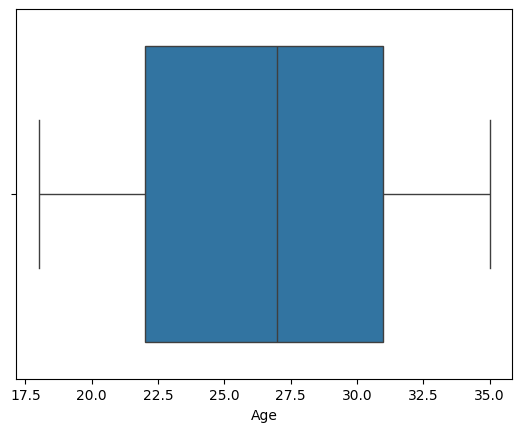

In [55]:
sns.boxplot(x="Age" , data=df )

<Axes: xlabel='Gender'>

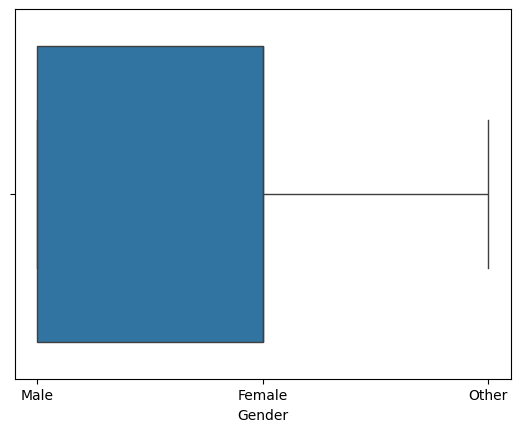

In [56]:
sns.boxplot(x="Gender" , data=df )

<Axes: xlabel='Region'>

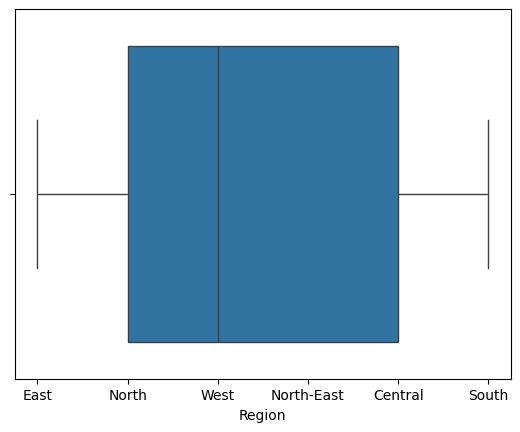

In [57]:
sns.boxplot(x="Region" , data=df )

<Axes: xlabel='Cholesterol Levels (mg/dL)'>

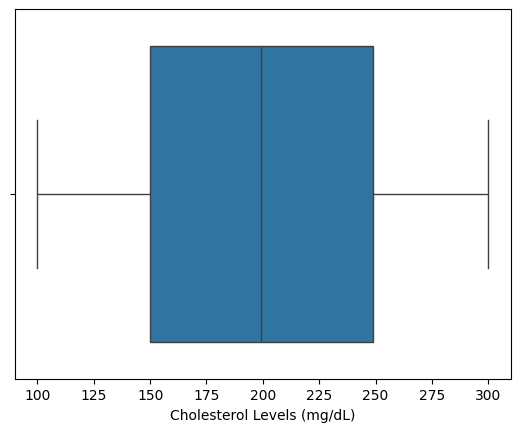

In [58]:
sns.boxplot(x="Cholesterol Levels (mg/dL)" , data=df )

<Axes: xlabel='BMI (kg/m²)'>

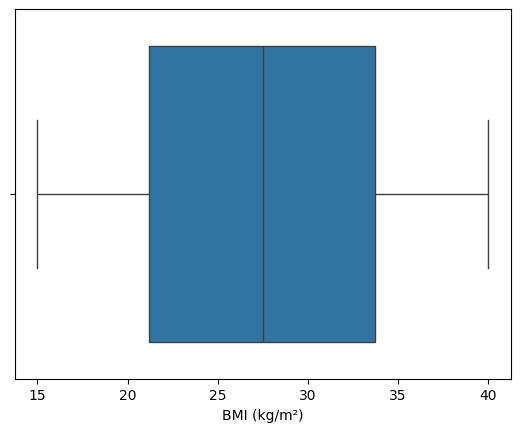

In [59]:
sns.boxplot(x="BMI (kg/m²)" , data=df )

<Axes: xlabel='Resting Heart Rate (bpm)'>

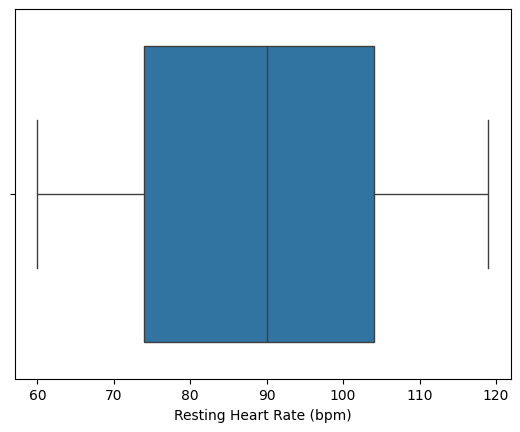

In [60]:
sns.boxplot(x="Resting Heart Rate (bpm)" , data=df )

In [61]:
df.drop(columns=['Urban/Rural','Hypertension','BMI (kg/m²)'], inplace=True)  


In [62]:
df.head()

,Age,Gender,Region,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Cholesterol Levels (mg/dL),Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Heart Attack Likelihood
0,30,Male,East,Never,Regularly,Non-Vegetarian,Sedentary,No,No,148,High,82,Normal,Non-anginal,No
1,24,Female,East,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,124,High,76,Normal,Non-anginal,No
2,24,Female,North,Occasionally,Occasionally,Vegan,High,Yes,Yes,256,Low,86,Normal,Typical,Yes
3,27,Male,East,Occasionally,Never,Vegetarian,Sedentary,No,No,137,Medium,106,Normal,Non-anginal,Yes
4,21,Female,West,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,262,Low,73,Normal,Atypical,No


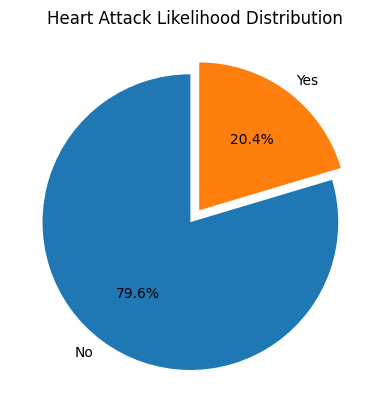

In [63]:

counts = df['Heart Attack Likelihood'].value_counts()

# Explode har slice ke liye thoda tukda alag dikhane ke liye
explode = [0.05] * len(counts)  # Har slice thoda bahar nikla hua dikhai dega
colors = ['#1f77b4', '#7B3F00']  
# Pie chart
counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)

plt.title('Heart Attack Likelihood Distribution')
plt.ylabel('')  # Y-axis label hata diya
plt.show()


Observation : Approximately 20.4% of the individuals are at risk of a heart attack, while the remaining 79% are not.
This indicates that although the majority are safe, a significant portion of the population still falls in the risk zone.

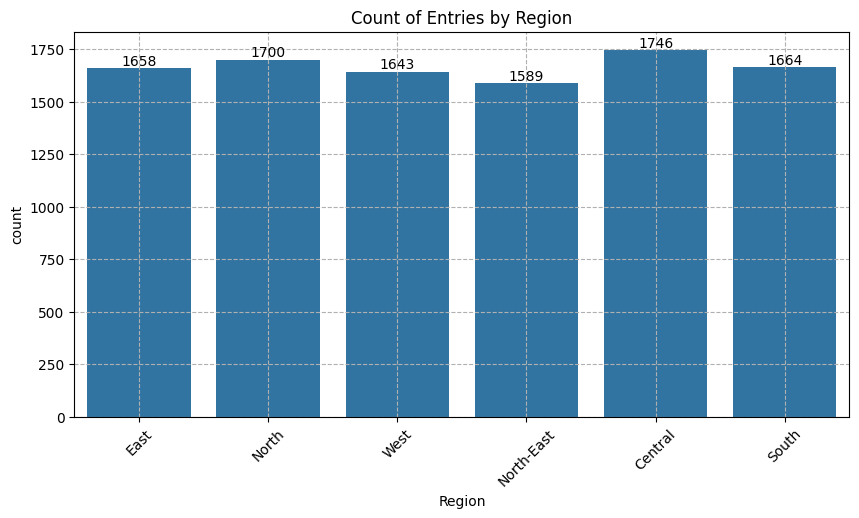

In [64]:

plt.figure(figsize=(10, 5))

# Count plot
ax = sns.countplot(data=df, x="Region" )

# Rotate labels
plt.xticks(rotation=45)

# Add count numbers on top of bars (super easy way)
ax.bar_label(ax.containers[0])

# Add grid lines
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')

plt.title('Count of Entries by Region')
plt.show()





Observation : Individuals from the Central region show a noticeably higher number of heart attack cases compared to other regions.

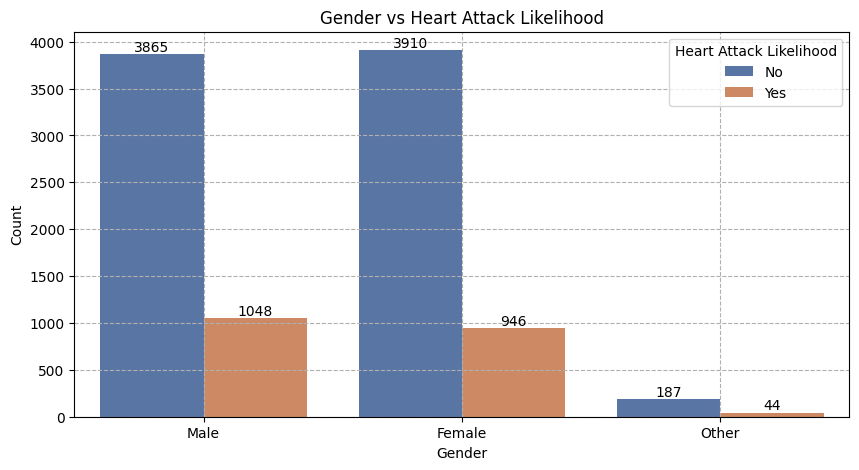

In [65]:

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Gender', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Gender vs Heart Attack Likelihood')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rotate x labels agar zarurat ho (Gender mein normally chhote hote hain, toh zaruri nahi)
# plt.xticks(rotation=45)

# Add count numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Add grid lines
plt.grid(axis='y', linestyle='--',linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Males are experiencing heart attacks more frequently than females in the dataset.
This highlights that gender may be an influencing factor

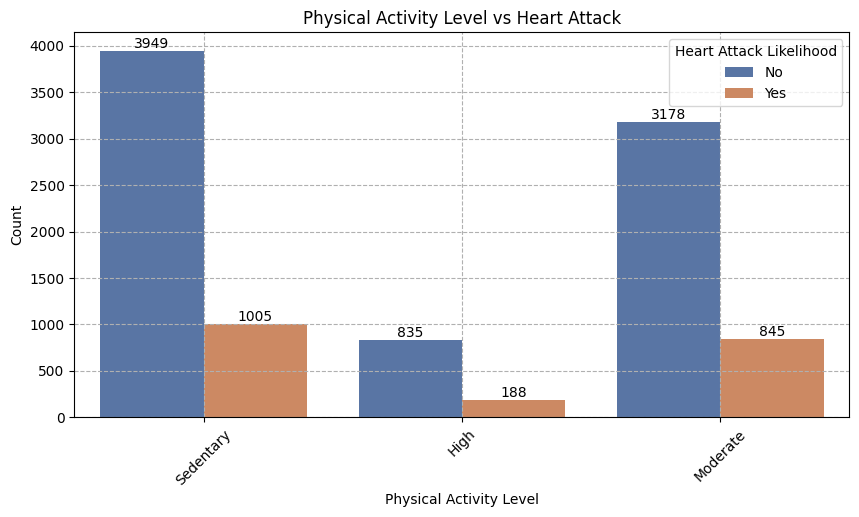

In [66]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Physical Activity Level', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Physical Activity Level vs Heart Attack')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

# Add grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : The number of heart attack cases is highest among individuals with a sedentary lifestyle.
In contrast, those with moderate or high activity levels show relatively fewer cases, indicating that low physical activity is a major risk factor.



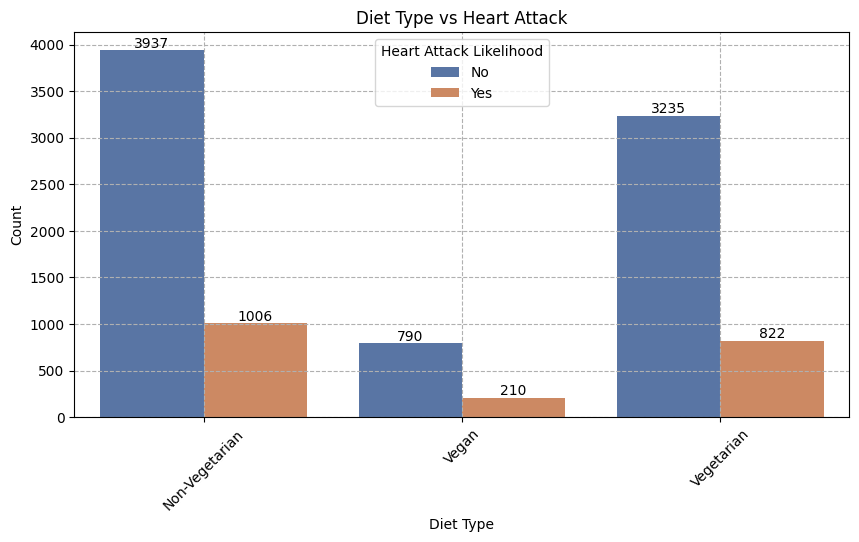

In [67]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Diet Type', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Diet Type vs Heart Attack')
plt.xlabel('Diet Type')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines add karo
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

# plt.show()

Observation : The analysis indicates a higher incidence of heart attacks among individuals consuming a non-vegetarian diet.

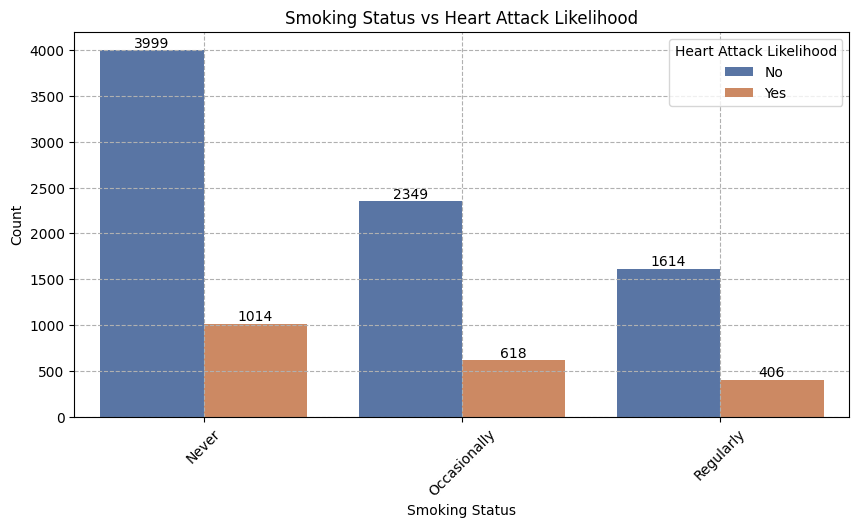

In [68]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Smoking Status', hue='Heart Attack Likelihood',palette='deep', data=df)

plt.title('Smoking Status vs Heart Attack Likelihood')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Add count numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Add grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Heart attacks are also occurring among individuals who have never smoked,
This indicates that factors other than smoking, such as diet or genetics, may contribute to heart attack risk.

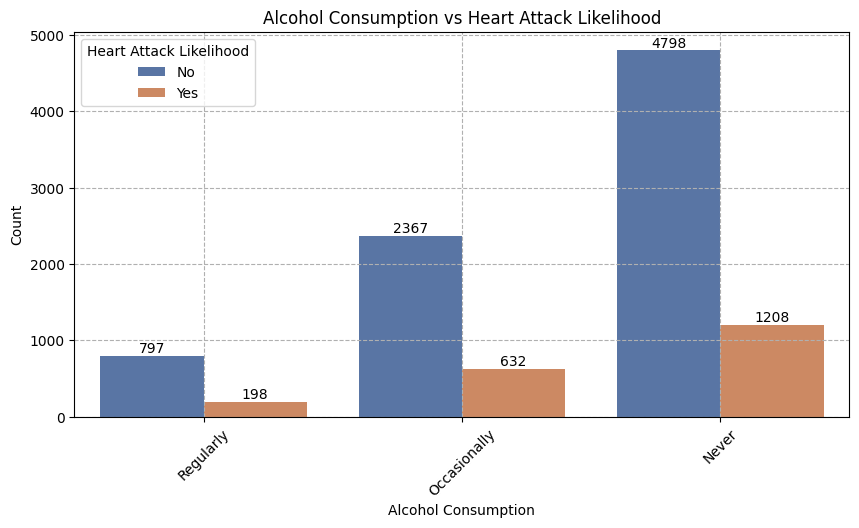

In [69]:


plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Alcohol Consumption', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Alcohol Consumption vs Heart Attack Likelihood')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Some people who do not drink alcohol are still having heart attacks. This means alcohol is not the only reason for heart problems. Other factors like diet and family history may also play a role.










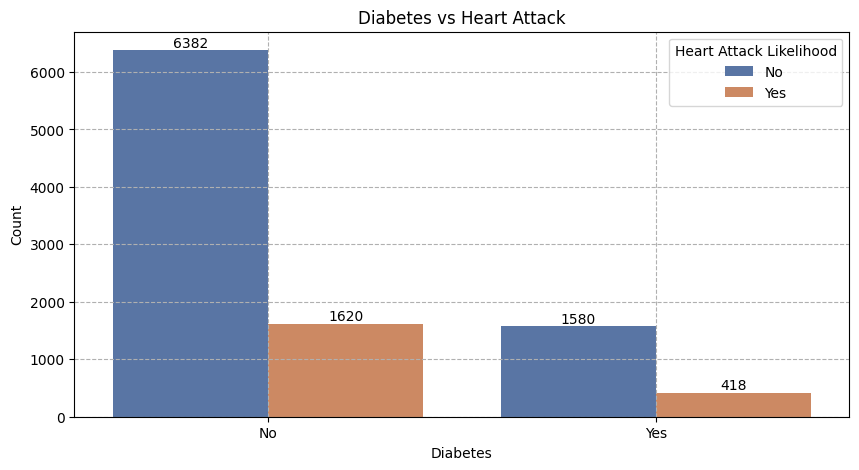

In [70]:

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Diabetes', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Diabetes vs Heart Attack')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines add karo
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : The total number of heart attacks is higher among people without diabetes

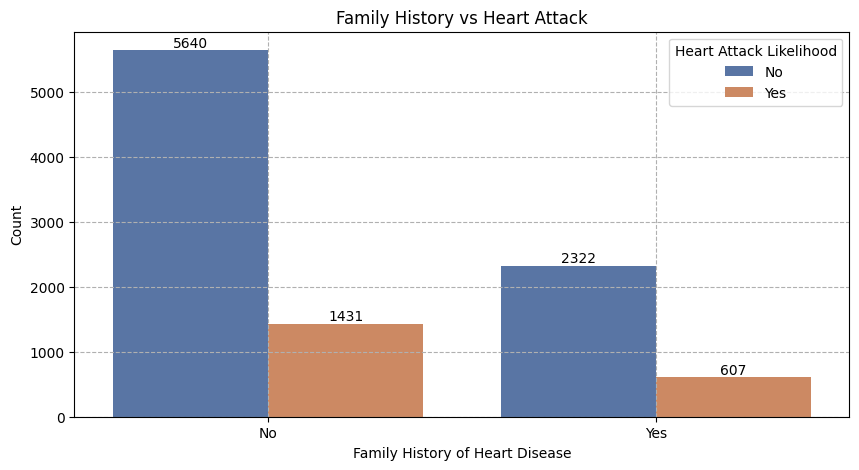

In [71]:

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Family History of Heart Disease', hue='Heart Attack Likelihood', palette='deep',data=df)

plt.title('Family History vs Heart Attack')
plt.xlabel('Family History of Heart Disease')
plt.ylabel('Count')

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines add karo
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()



Observation : Even if there is no family history of heart attacks, a person can still have a higher risk of experiencing a heart attack due to other factors.

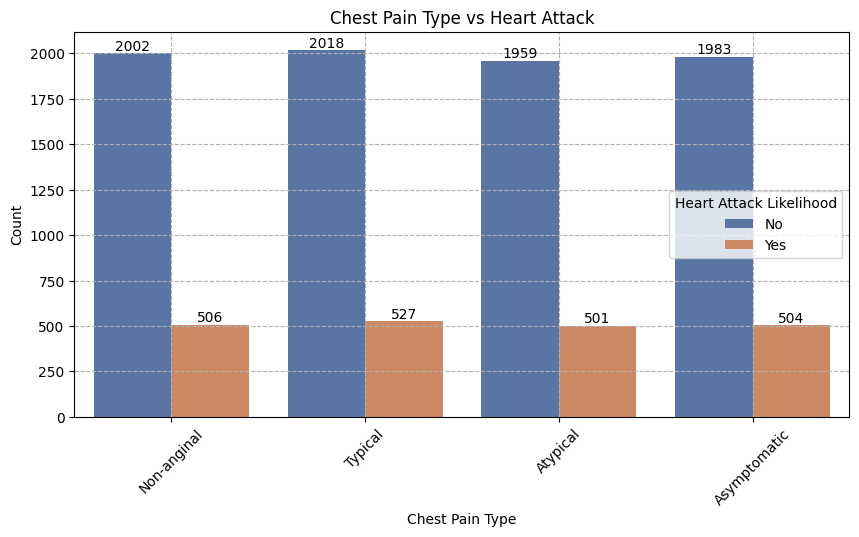

In [72]:

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Chest Pain Type', hue='Heart Attack Likelihood', palette='deep', data=df)

plt.title('Chest Pain Type vs Heart Attack')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines add karo
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Most heart attacks are happening in people with typical chest pain rather than those with non-anginal or atypical pain.

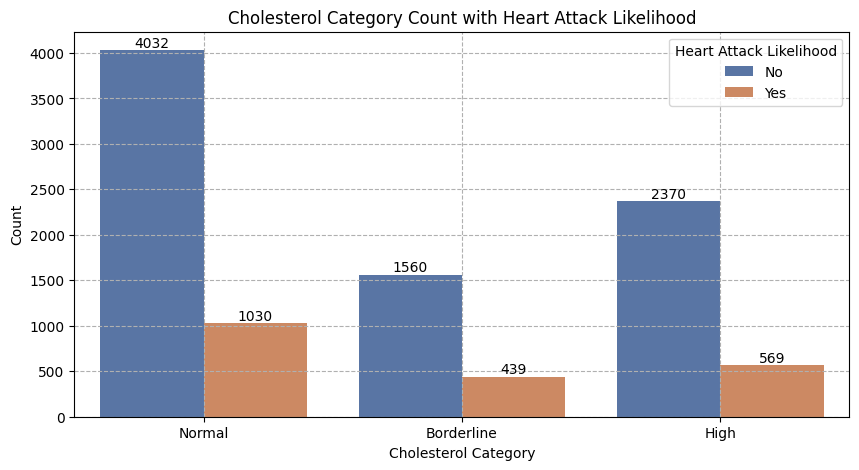

In [73]:

# Cholesterol Category create karna
df['Cholesterol Category'] = pd.cut(
    df['Cholesterol Levels (mg/dL)'], 
    bins=[0, 200, 240, 600], 
    labels=['Normal', 'Borderline', 'High']
)

# Plot figure size set karo
plt.figure(figsize=(10, 5))

# Countplot with hue for Heart Attack Likelihood
ax = sns.countplot(data=df, x='Cholesterol Category', hue='Heart Attack Likelihood',palette='deep')

plt.title('Cholesterol Category Count with Heart Attack Likelihood')
plt.xlabel('Cholesterol Category')
plt.ylabel('Count')

# Bars ke upar count labels (har hue category ke liye)
for container in ax.containers:
    ax.bar_label(container)

plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)
plt.show()


Observation : The graph shows that normal cholestrol category has more chance of heart attack

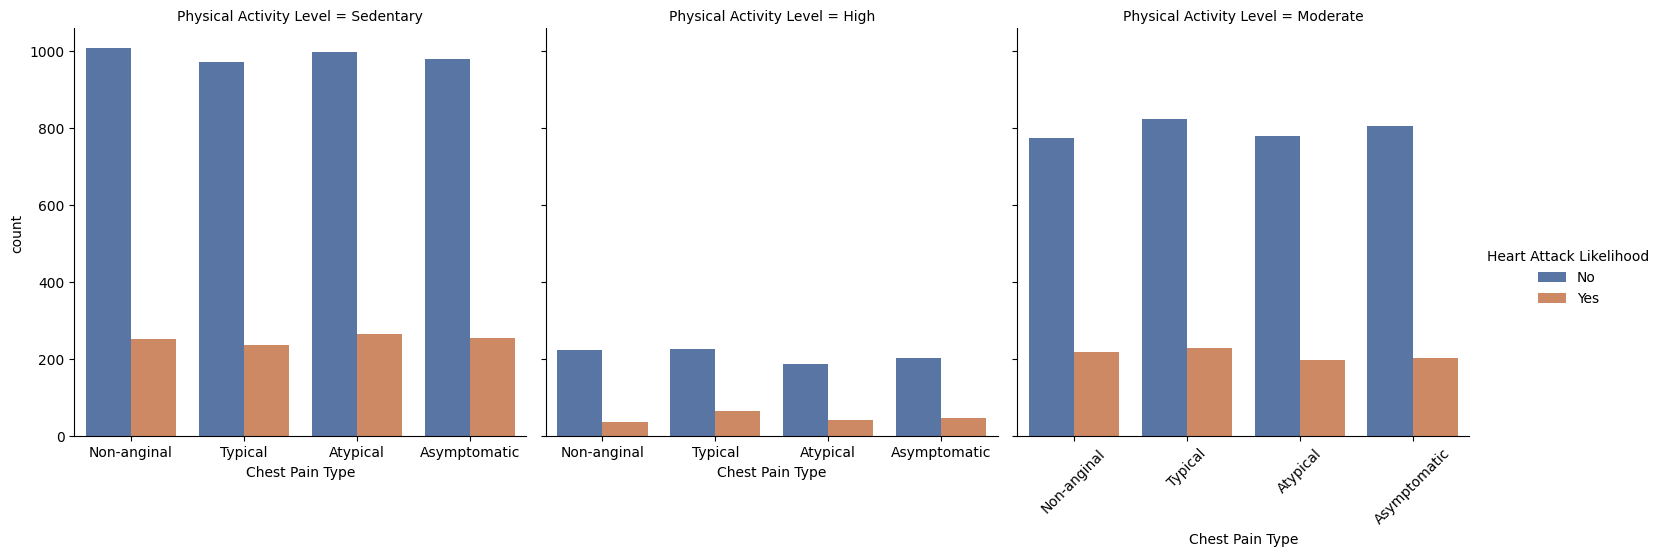

In [74]:
sns.catplot(
    data=df,
    x="Chest Pain Type",
    hue="Heart Attack Likelihood",
    col="Physical Activity Level",
    kind="count",
    palette="deep"
)
plt.xticks(rotation=45)
plt.show()



Observation : in sedentary group heart attack likelihood is higher for those with atypical and asymptomatic chest pain, in moderate group most attack cases are seen with typical chest pain, in high activity group heart attack chance is more intypical chest pain type

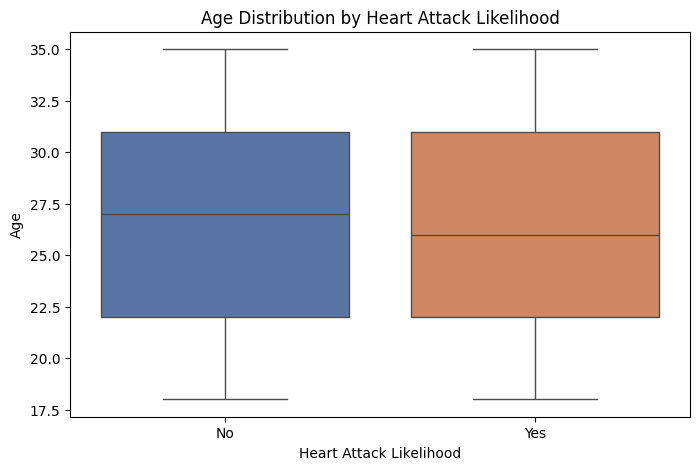

In [75]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Heart Attack Likelihood', y='Age', palette='deep')

plt.title('Age Distribution by Heart Attack Likelihood')
plt.xlabel('Heart Attack Likelihood')
plt.ylabel('Age')
plt.show()


Observation : The people are getting more herat attack of age group 25 to 27

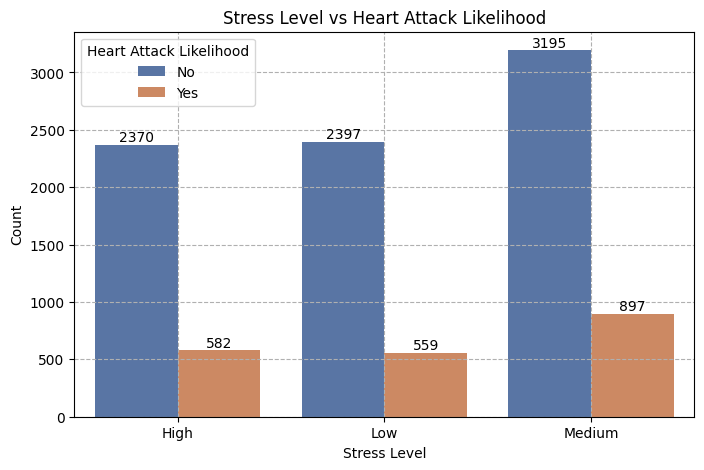

In [76]:
plt.figure(figsize=(8,5))

ax = sns.countplot(data=df, x='Stress Level', hue='Heart Attack Likelihood' , palette='deep')

plt.title('Stress Level vs Heart Attack Likelihood')
plt.xlabel('Stress Level')
plt.ylabel('Count')

# Bars ke upar count numbers add karna
for container in ax.containers:
    ax.bar_label(container)

# Horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Heart attacks are more frequently observed in individuals with moderate stress levels.
This suggests that even medium stress can significantly impact cardiovascular health.
Managing stress effectively is important to reduce the risk of heart-related issues.










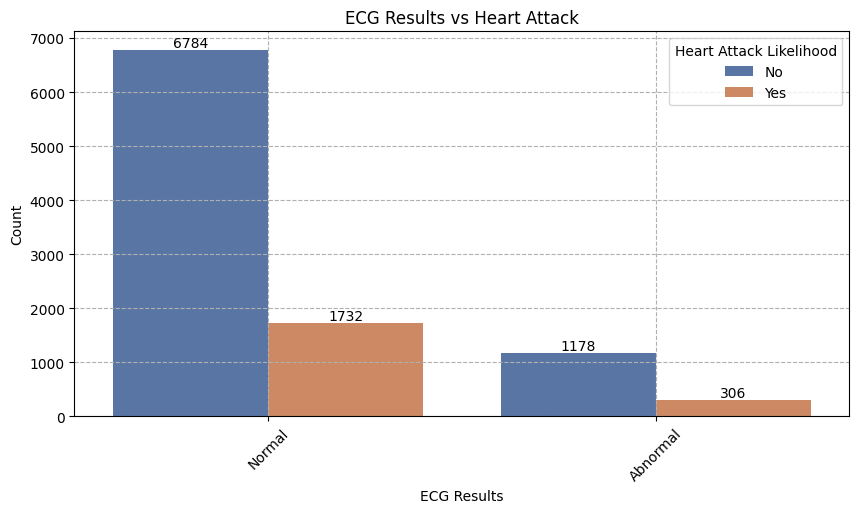

In [77]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x='ECG Results', hue='Heart Attack Likelihood',palette='deep', data=df)

plt.title('ECG Results vs Heart Attack')
plt.xlabel('ECG Results')
plt.ylabel('Count')

plt.xticks(rotation=45)

# Bars ke upar count labels
for container in ax.containers:
    ax.bar_label(container)

# Grid lines add karo
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.8)

plt.show()


Observation : Heart attacks have been observed even in individuals with normal ECG results.

Conclusion : Heart attack risk is influenced by multiple lifestyle, health, and demographic factors. Males, individuals from the Central region, and those with a sedentary lifestyle or non-vegetarian diet show higher incidences. Most heart attacks occur in people with typical chest pain and moderate stress levels, indicating these are strong warning signs. Interestingly, cases also exist among non-smokers, non-drinkers, and non-diabetics, highlighting the role of other factors like genetics and diet.










In [78]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

encoded_data=encoder.fit_transform(df[['Gender','Region','Smoking Status','Alcohol Consumption','Diet Type','Family History of Heart Disease','Diabetes']])

df2=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender','Region','Smoking Status','Alcohol Consumption','Diet Type','Family History of Heart Disease','Diabetes']))

result=pd.concat([df,df2], axis=1)
result


,Age,Gender,Region,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Cholesterol Levels (mg/dL),...,Alcohol Consumption_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Diet Type_Non-Vegetarian,Diet Type_Vegan,Diet Type_Vegetarian,Family History of Heart Disease_No,Family History of Heart Disease_Yes,Diabetes_No,Diabetes_Yes
0,30,Male,East,Never,Regularly,Non-Vegetarian,Sedentary,No,No,148,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,24,Female,East,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,124,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,Female,North,Occasionally,Occasionally,Vegan,High,Yes,Yes,256,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,27,Male,East,Occasionally,Never,Vegetarian,Sedentary,No,No,137,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,21,Female,West,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,262,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,East,Occasionally,Occasionally,Vegan,Sedentary,No,Yes,141,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9996,35,Female,North-East,Occasionally,Never,Vegan,High,No,No,188,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9997,32,Male,West,Regularly,Never,Non-Vegetarian,Moderate,Yes,Yes,221,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9998,21,Female,Central,Regularly,Never,Vegan,Sedentary,Yes,No,188,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Region'] = label_encoder.fit_transform(df['Region'])
df['Stress Level'] = label_encoder.fit_transform(df['Stress Level'])

df


,Age,Gender,Region,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Cholesterol Levels (mg/dL),Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Heart Attack Likelihood,Cholesterol Category
0,30,Male,1,Never,Regularly,Non-Vegetarian,Sedentary,No,No,148,0,82,Normal,Non-anginal,No,Normal
1,24,Female,1,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,124,0,76,Normal,Non-anginal,No,Normal
2,24,Female,2,Occasionally,Occasionally,Vegan,High,Yes,Yes,256,1,86,Normal,Typical,Yes,High
3,27,Male,1,Occasionally,Never,Vegetarian,Sedentary,No,No,137,2,106,Normal,Non-anginal,Yes,Normal
4,21,Female,5,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,262,1,73,Normal,Atypical,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,1,Occasionally,Occasionally,Vegan,Sedentary,No,Yes,141,1,88,Abnormal,Atypical,No,Normal
9996,35,Female,3,Occasionally,Never,Vegan,High,No,No,188,1,116,Normal,Atypical,No,Normal
9997,32,Male,5,Regularly,Never,Non-Vegetarian,Moderate,Yes,Yes,221,0,62,Normal,Typical,No,Borderline
9998,21,Female,0,Regularly,Never,Vegan,Sedentary,Yes,No,188,2,84,Abnormal,Non-anginal,No,Normal


In [80]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result

,Age,Region,Cholesterol Levels (mg/dL),Stress Level,Resting Heart Rate (bpm),Gender_Male,Gender_Other,Smoking Status_Occasionally,Smoking Status_Regularly,Alcohol Consumption_Occasionally,...,Physical Activity Level_Sedentary,Family History of Heart Disease_Yes,Diabetes_Yes,ECG Results_Normal,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Heart Attack Likelihood_Yes,Cholesterol Category_Borderline,Cholesterol Category_High
0,30,1,148,0,82,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,24,1,124,0,76,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,24,2,256,1,86,0,0,1,0,1,...,0,1,1,1,0,0,1,1,0,1
3,27,1,137,2,106,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
4,21,5,262,1,73,0,0,1,0,1,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,1,141,1,88,0,0,1,0,1,...,1,0,1,0,1,0,0,0,0,0
9996,35,3,188,1,116,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
9997,32,5,221,0,62,1,0,0,1,0,...,0,1,1,1,0,0,1,0,1,0
9998,21,0,188,2,84,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [81]:
result.columns

Index(['Age', 'Region', 'Cholesterol Levels (mg/dL)', 'Stress Level',
       'Resting Heart Rate (bpm)', 'Gender_Male', 'Gender_Other',
       'Smoking Status_Occasionally', 'Smoking Status_Regularly',
       'Alcohol Consumption_Occasionally', 'Alcohol Consumption_Regularly',
       'Diet Type_Vegan', 'Diet Type_Vegetarian',
       'Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary',
       'Family History of Heart Disease_Yes', 'Diabetes_Yes',
       'ECG Results_Normal', 'Chest Pain Type_Atypical',
       'Chest Pain Type_Non-anginal', 'Chest Pain Type_Typical',
       'Heart Attack Likelihood_Yes', 'Cholesterol Category_Borderline',
       'Cholesterol Category_High'],
      dtype='object')

In [82]:
X =result.drop('Heart Attack Likelihood_Yes',axis=1)  # Independent variables
Y = result['Heart Attack Likelihood_Yes']  # Target variable

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [84]:
print('Shape of X_train is -' , x_train.shape)
print('Shape of X_train is -' , x_train.shape)
print('Shape of y_train is -' , y_train.shape)
print ('Shape of y_train is -' , y_train.shape)

Shape of X_train is - (8000, 23)
Shape of X_train is - (8000, 23)
Shape of y_train is - (8000,)
Shape of y_train is - (8000,)


In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [86]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.805
